In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Loading Data
There are 12 files belonging to 3 scenarios for four algorithms.

In [2]:
file_path = "Objective_Functions/objective_"


# Diagonalization algorithm
df_diag_mixed = pd.read_csv(file_path + "Mixed_Diag.csv")
df_diag_PVs = pd.read_csv(file_path + "Fixed_PVs_Diag.csv")
df_diag_EVs = pd.read_csv(file_path + "Fixed_EVs_Diag.csv")

# AHE algorithm
df_ahe_mixed = pd.read_csv(file_path + "Mixed_AHE.csv")
df_ahe_PVs = pd.read_csv(file_path + "Fixed_PVs_AHE.csv")
df_ahe_EVs = pd.read_csv(file_path + "Fixed_EVs_AHE.csv")

#FP Algorithm
df_fp_mixed = pd.read_csv(file_path + "Mixed_FP.csv")
df_fp_PVs = pd.read_csv(file_path + "Fixed_PVs_FP.csv")
df_fp_EVs = pd.read_csv(file_path + "Fixed_EVs_FP.csv")

#SFP Algorithms
df_sfp_mixed = pd.read_csv(file_path + "Mixed_SFP.csv")
df_sfp_PVs = pd.read_csv(file_path + "Fixed_PVs_SFP.csv")
df_sfp_EVs = pd.read_csv(file_path + "Fixed_EVs_SFP.csv")


In [6]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, 
          df_ahe_mixed,  df_ahe_PVs,  df_ahe_EVs, 
          df_fp_mixed,   df_fp_PVs,   df_fp_EVs, 
          df_sfp_mixed,  df_sfp_PVs,  df_sfp_EVs ]

algo_list = ["Diag", "AHE", "FP", "SFP"]

scen_list = ["Mixed", "Fixed_EVS", "Fixed_PVs"]

# 2) Compare Dataframe values

### 2.1) Compare based on scenario and algorithm last N Iterations

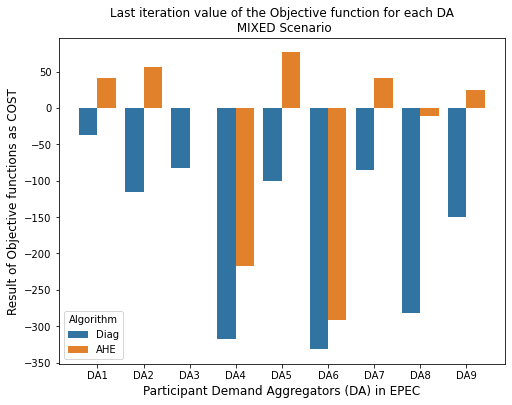

In [4]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]


for idx , val in zip(df_diag_mixed.iloc[-1].index, df_diag_mixed.iloc[-1]):
    cost.append(val)
    da.append('DA'+str(idx))
    algo.append('Diag')

for idx , val in zip(df_ahe_mixed.iloc[-1].index, df_ahe_mixed.iloc[-1]):
    cost.append(val)
    da.append('DA'+str(idx))
    algo.append('AHE')

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_temp, x='DA',y='Cost' ,hue='Algorithm', ax=ax);

ax.set_title('Last iteration value of the Objective function for each DA\n MIXED Scenario', fontsize=12)
ax.set_xlabel('Participant Demand Aggregators (DA) in EPEC',fontsize=12);
ax.set_ylabel('Result of Objective functions as COST',fontsize=12);

ax.plot()

ax.set_rasterized(True)
#fig.savefig("Figures/obj_figures/Mixed_Last_Iterations_BarPlot_Diag_AHE.eps", bbox_inches= 'tight')

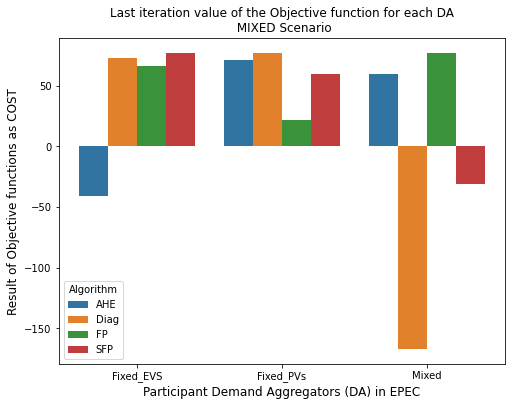

In [37]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]
scen=[]

counter = 0

for df in df_all:
    for idx , val in zip(df.iloc[-1].index, df.iloc[-1]):
        cost.append(val)
        da.append('DA'+str(idx))
        algo.append(algo_list[counter % 4])
        scen.append(scen_list[counter%3])
    counter+=1

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da, 'Scenario':scen})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','Scenario']).mean().reset_index(),
            x='Scenario',y='Cost' ,hue='Algorithm', #hue_order=order,
            ax=ax);

ax.set_title('Last iteration value of the Objective function for each DA\n MIXED Scenario', fontsize=12)
ax.set_xlabel('Participant Demand Aggregators (DA) in EPEC',fontsize=12);
ax.set_ylabel('Result of Objective functions as COST',fontsize=12);

ax.plot()

ax.set_rasterized(True)


In [36]:
df_temp.groupby(['Algorithm','Scenario']).mean().reset_index()

,Algorithm,Scenario,Cost
0,AHE,Fixed_EVS,-40.651955
1,AHE,Fixed_PVs,70.768493
2,AHE,Mixed,59.635441
3,Diag,Fixed_EVS,72.379586
4,Diag,Fixed_PVs,77.004018
5,Diag,Mixed,-166.935406
6,FP,Fixed_EVS,66.489474
7,FP,Fixed_PVs,21.985850
8,FP,Mixed,77.012261
9,SFP,Fixed_EVS,77.163444
